# Assignment 3

## Importing requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

## Loading the data

In [3]:
df = pd.read_csv("./sonar.all-data",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


### Since there are alomost same number of "Metal" and "Rock" class, there is no need to assign class weights or augment data

In [5]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

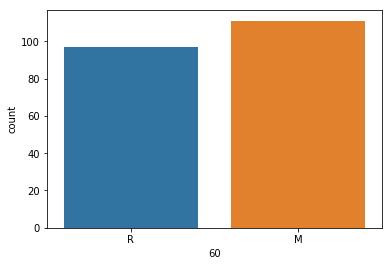

In [6]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x=60, data=df)

## EDA

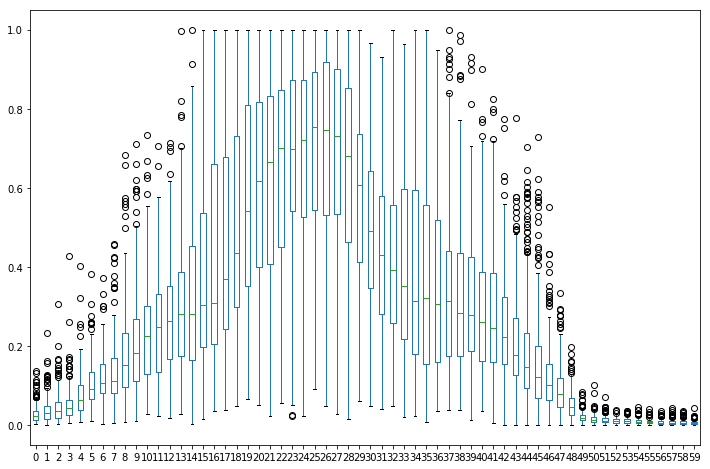

In [7]:
df.plot(kind='box', figsize=(12,8))

In [10]:
def main():
    x = df.drop(columns = 60).values
    y = df[60].as_matrix()
    """
    declared test size as 0.33
    """
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
    print(x.shape)
    print(y.shape)
    
    """
    SVM
    """
    print("*************************************")
    print("SVM start")
    """
    Declaring the parmeters for Gridsearch
    
    """
    parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 10,100,1000,2000,3000]}
    svc = SVC(gamma="scale")
    clf = GridSearchCV(svc, parameters, cv=5)
    clf.fit(X_train,y_train)
    print(clf.best_estimator_)
    y_pred = clf.predict(X_test)
#     print(sorted(clf.cv_results_.keys()))
#     df2=pd.DataFrame(clf.cv_results_)
#     print(df2.head())
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("Confusion matrix: ",confusion_matrix(y_test, y_pred))
    print("SVM end")
    """
    Random forest
    """
    print("*************************************")
    
    print("random forest start")
    """
    Declaring the parmeters for Gridsearch
    
    """
    param_grid = { 
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : range(2,20),
    'criterion' :['gini', 'entropy']
    }
    rfc=RandomForestClassifier(random_state=42)
    CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
    CV_rfc.fit(X_train, y_train)
    print(CV_rfc.best_estimator_)
    y_pred = CV_rfc.predict(X_test)
#     df2=pd.DataFrame(CV_rfc.cv_results_)
#     print(df2.head())
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("Confusion matrix: ",confusion_matrix(y_test, y_pred))
    print("Random forest end")
    print("*************************************")
    
    """
    Decision Tree
    """
    print("Decision Tree start")
    """
    Declaring the parmeters for Gridsearch
    
    """
    param_grid = { 
    'max_depth' : range(2,20),
    'criterion' :['gini', 'entropy'],
    'splitter' :['best','random'],
    'min_samples_split' : range(2,20)   
    }
    dct = tree.DecisionTreeClassifier(random_state=42)
    dt = GridSearchCV(estimator=dct, param_grid=param_grid, cv=5)
    dt.fit(X_train,y_train)
    print(dt.best_estimator_)
    y_pred = dt.predict(X_test)
#     df2=pd.DataFrame(CV_rfc.cv_results_)
#     print(df2.head())
    print("Accuracy Score: ",accuracy_score(y_test,y_pred))
    print("Confusion matrix: ",confusion_matrix(y_test, y_pred))
    print("Decision tree end")

In [11]:
main()

/home/varun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(208, 60)
(208,)
*************************************
SVM start


/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Accuracy Score:  0.8985507246376812
Confusion matrix:  [[36  2]
 [ 5 26]]
SVM end
*************************************
random forest start


/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Accuracy Score:  0.7971014492753623
Confusion matrix:  [[32  6]
 [ 8 23]]
Random forest end
*************************************
Decision Tree start
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='random')
Accuracy Score:  0.782608695652174
Confusion matrix:  [[30  8]
 [ 7 24]]
Decision tree end


/home/varun/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Xgboost classifier 

In [12]:
from xgboost import XGBClassifier

In [14]:
x = df.drop(columns = 60).values
y = df[60].as_matrix()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

/home/varun/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [15]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [16]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7971014492753623